# DBSCAN

Vamos a usar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para este ejercicio. DBSCAN es un algoritmo de agrupamiento que divide un conjunto de datos en grupos (o clusters) basándose en la densidad de los puntos en el espacio de datos. A diferencia de otros algoritmos de agrupamiento, como k-means, DBSCAN no requiere que especifiques el número de clusters a priori y puede encontrar clusters de formas y tamaños arbitrarios.

In [1]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'
df = pd.read_csv(url)

df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


Limpieza y preprocesamiento de los datos

Dado que DBSCAN es un algoritmo basado en la densidad y la distancia entre los puntos de datos, es sensible a la escala de los datos. Por lo tanto, es una buena práctica escalar nuestros datos. Además, también vamos a seleccionar las columnas relevantes para el análisis de agrupamiento.

In [3]:
# Seleccionamos las columnas relevantes

df = df[['Lat','Long_']]

#Eliminamos los valores nulos
df = df.dropna()

In [4]:
#Estándarizamos los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled[:5]

array([[-0.13665864,  2.51431547],
       [ 0.40213376,  1.65326118],
       [-0.57768977,  1.31803945],
       [ 0.50318268,  1.31554367],
       [-3.50807864,  1.61170598]])

Modelado con DBSCAN

Vamos a utilizar la implementación de DBSCAN disponible en la biblioteca scikit-learn para modelar nuestros datos.




In [5]:
from sklearn.cluster import DBSCAN

# Instanciamos el modelo DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
# eps: distancia máxima entre dos muestras para que se consideren en el mismo vecindario.
# min_samples: número mínimo de muestras en un vecindario para considerar que un punto es un punto central.

# Ajustamos el modelo

model = dbscan.fit(df_scaled)

hemos definido un objeto DBSCAN con una distancia epsilon de 0.5 y un mínimo de 5 muestras para considerar un punto como núcleo. Luego, ajustamos el modelo a nuestros datos.

eps es la máxima distancia entre dos muestras para que se consideren en el mismo vecindario.

min_samples es el número de muestras en una vecindad para que un punto sea considerado como un punto central.

Análisis de Resultados

Vamos a ver cuántos clústeres hemos obtenido y cómo se distribuyen los puntos entre ellos.

Primero, recuperaremos las etiquetas del modelo, que representan el número de clúster asignado a cada punto de datos.

In [6]:
labels = model.labels_

In [7]:
# Ahora, obtenemos el número de clústeres (ignorando el ruido, si está presente).

unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 26, 0: 494, 1: 3390, 2: 7, 3: 5}

Esto te mostrará un diccionario donde las claves son los números de clúster y los valores son la cantidad de puntos en cada clúster.

Debemos recordar que en DBSCAN, los puntos que son considerados como ruido se etiquetan como -1. Por lo tanto, si ves -1 en tus clústeres, esos son puntos de ruido.

Las etiquetas son {-1, 0, 1, 2, 3}. La etiqueta -1 se asigna a los datos que el algoritmo considera como ruido, es decir, que no pertenecen a ningún clúster en particular. Tenemos 26 puntos de ruido según los resultados.

Luego, los puntos restantes se dividen en 4 clústeres (etiquetas 0, 1, 2, 3) con 494, 3390, 7 y 5 puntos respectivamente.

Esto indica que la mayoría de los datos se han agrupado en el clúster etiquetado como 1, mientras que los clústeres 2 y 3 son muy pequeños con solo 7 y 5 puntos respectivamente.

Por último, es importante recordar que los resultados del algoritmo DBSCAN dependen de los parámetros que seleccionamos (eps y min_samples), por lo que podríamos obtener diferentes resultados con diferentes parámetros.

Ahora vamos a visualizar los clusters. Como nuestros datos son multidimensionales (tenemos muchas características en el conjunto de datos), no podemos visualizar todos los puntos de datos en un solo gráfico. Por lo tanto, necesitamos reducir la dimensionalidad de nuestros datos a 2D para visualizarlos. Podemos hacer esto utilizando técnicas como PCA (Principal Component Analysis).

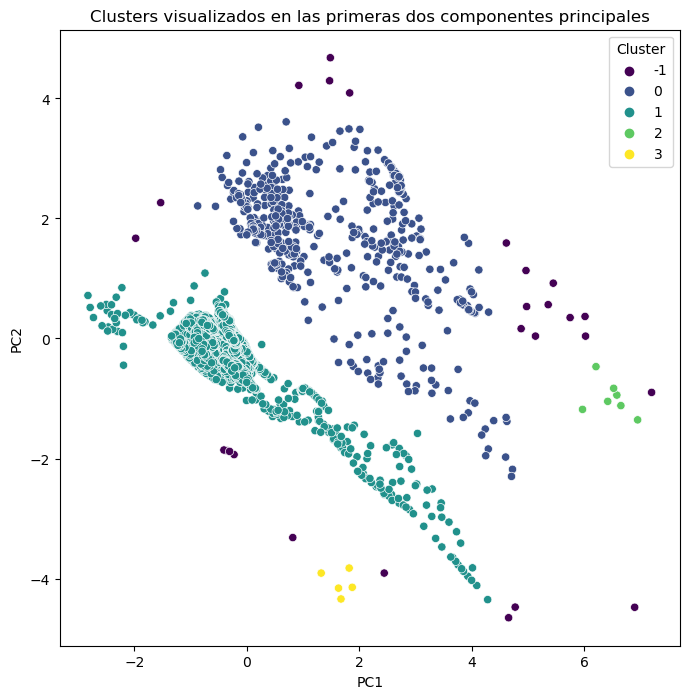

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

# Instanciamos el modelo PCA

pca = PCA(n_components=2) # n_components es el número de componentes principales que queremos obtener
pca_result = pca.fit_transform(df_scaled)

# Creamos un dataframe con los resultados

pc_df = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])

# Añadimos las etiquetas de los clusters

pc_df['Cluster'] = labels

# Visualizamos los clusters

plt.figure(figsize=(8,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pc_df)
plt.title('Clusters visualizados en las primeras dos componentes principales')
plt.show()

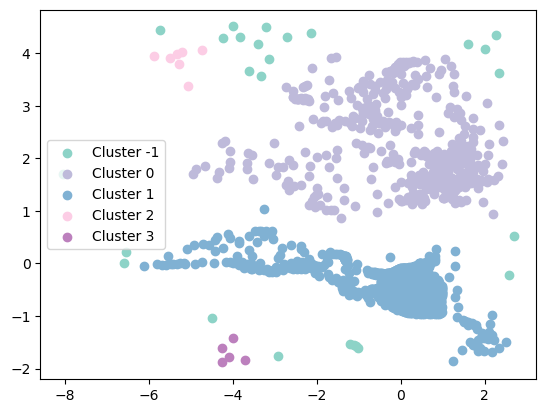

In [11]:
# Generar una paleta de colores que tenga suficientes colores distintos para cada cluster.
# DBSCAN etiqueta los outliers como -1, así que añadimos 1 al número de clusters para tener un color para ellos.
palette = plt.get_cmap('Set3', np.unique(dbscan.labels_).size + 1)

# Crear una figura y un eje para el gráfico.
fig, ax = plt.subplots()

# Por cada cluster, trazar los puntos en ese cluster con el color correspondiente de la paleta.
for cluster in np.unique(dbscan.labels_):
    # Escoger el color del cluster de la paleta.
    color = palette(cluster + 1)  # Añadir 1 porque los índices de paleta deben ser positivos.

    # Trazar los puntos en este cluster.
    ax.scatter(df_scaled[dbscan.labels_ == cluster, 0], df_scaled[dbscan.labels_ == cluster, 1],
               color=color, label=f'Cluster {cluster}')

# Añadir una leyenda y mostrar el gráfico.
ax.legend()
plt.show()

In [12]:
# Evaluación del modelo

from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6628315843374267
